# The Spark Foundation- Graduate Rotational Internship Program

# DOMAIN
Data Science and Business Analytics



# TASK
EDA on Sports(IPL dataset)

# PURPOSE
To find out the most succesful teams, player and factors

In [1]:
#displaying IPL image

from IPython.display import Image
Image(url="https://etimg.etb2bimg.com/photo/74508790.cms", width=550,height=300)


In [47]:
#importing liabraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.mlab as mlab
import seaborn as sns

In [3]:
#reading dataset

data1=pd.read_csv("C:\\Users\sunil\Desktop\spark\Indian Premier League\deliveries.csv")
data2=pd.read_csv("C:\\Users\sunil\Desktop\spark\Indian Premier League\matches.csv")

In [4]:
print(data1.shape)
print(data2.shape)

(179078, 21)
(756, 18)


In [5]:
data1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [8]:
#data cleaning and preprocessing

In [9]:
#renaming

In [10]:
def name_changer(data):
    if data=="Delhi Daredevils":
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data="Sunrisers Hyderabad"
    elif data=="Pune Warriors" or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiant'
    return data

In [11]:
#applying changes to matches dataset

In [12]:
data2["team1"]=data2["team1"].apply(lambda x:name_changer(x))
data2['team2']=data2['team2'].apply(lambda x:name_changer(x))
data2['toss_winner']=data2['toss_winner'].apply(lambda x:name_changer(x))
data2['winner']=data2["winner"].apply(lambda x:name_changer(x))

In [13]:
#applying changes to deliveries dataset

In [14]:
data1['batting_team']=data1['batting_team'].apply(lambda x:name_changer(x))
data1['bowling_team']=data1['bowling_team'].apply(lambda x:name_changer(x))

In [15]:
#now lets see if the changes are applied successfully

In [16]:
data2.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'], dtype=object)

In [17]:
data1.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'], dtype=object)

In [18]:
#displaying teams names by their shorform

In [19]:
data2.replace(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'],
             ['SRH',"RCB",'MI','RPS','GL','KKR','KKIP','DC','CSK','RR','KTK','RPS'],inplace=True)
data1.replace(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants'],
              ['SRH',"RCB",'MI','RPS','GL','KKR','KKIP','DC','CSK','RR','KTK','RPS'],inplace=True)

In [20]:
data2.team1.unique()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DC', 'KKIP', 'CSK', 'RR',
       'KTK'], dtype=object)

In [21]:
data1.batting_team.unique()

array(['SRH', 'RCB', 'MI', 'RPS', 'GL', 'KKR', 'KKIP', 'DC', 'CSK', 'RR',
       'KTK'], dtype=object)

In [22]:
#CLEANING MATHES DATASET

In [45]:
#checking duplicates
data1.duplicated().sum()

23

In [23]:
data2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [24]:
#dropping umpires

In [25]:
data2=data2.drop(columns=['umpire1','umpire2','umpire3'],axis=1)
data2['city'].fillna("not known",inplace=True)
data2['winner'].fillna("not known",inplace=True)
data2['player_of_match'].fillna("not known",inplace=True)
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [49]:
#checking duplicates
data2.duplicated().sum()

0

In [26]:
#data visualization

In [27]:
#1.Total wins picked by every teams so far (till 2019)

In [28]:
data2.winner.value_counts()

MI           109
CSK          100
KKR           92
SRH           87
RCB           84
KKIP          82
DC            77
RR            75
RPS           27
GL            13
KTK            6
not known      4
Name: winner, dtype: int64

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


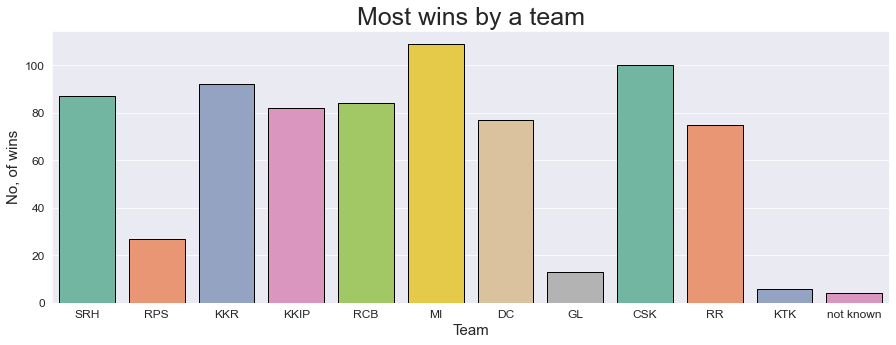

In [29]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.countplot(data2['winner'],palette='Set2',edgecolor='black')
plt.title('Most wins by a team',size=25)
plt.xlabel('Team',size=15)
plt.ylabel('No, of wins',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [30]:
#2.top match winneres

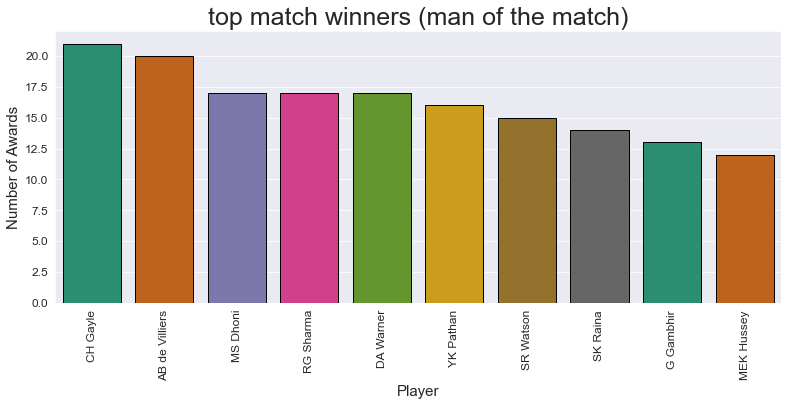

In [31]:
most_mom=data2['player_of_match'].value_counts().head(10).reset_index()
most_mom.columns=['Player','No. of Awards']

plt.figure(figsize=(13,5))
sns.barplot(x=most_mom['Player'],y=most_mom['No. of Awards'],palette='Dark2',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('top match winners (man of the match)',size=25)
plt.ylabel('Number of Awards',size=15)
plt.xlabel('Player',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [32]:
#best batsmen(in terms of runs)

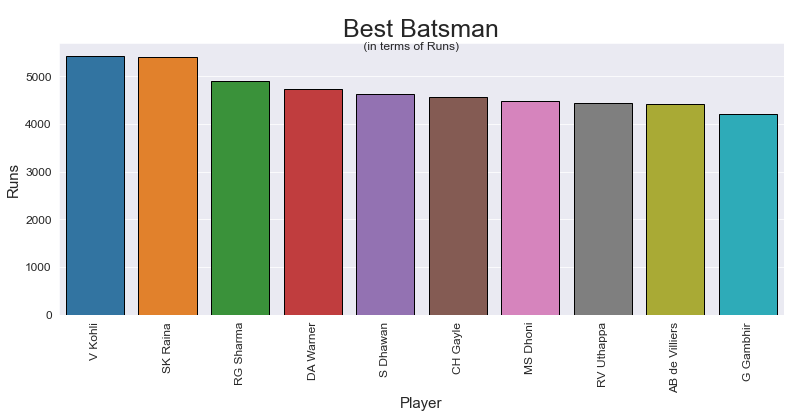

In [33]:
best_batsman=data1.groupby(['batsman']).batsman_runs.sum().reset_index()
best_batsman=best_batsman.set_index('batsman').sort_values(by=['batsman_runs'],ascending=False).head(10)

plt.figure(figsize=(13,5))
sns.barplot(x=best_batsman.index,y=best_batsman['batsman_runs'],edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Batsman',size=25)
plt.suptitle('\n\n\n (in terms of Runs)')
plt.ylabel('Runs',size=15)
plt.xlabel('Player',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [34]:
#in terms of Strike  Rate

In [35]:
strike_rate=data1.groupby(['batsman']).batsman_runs.sum().reset_index()
strike_rate['balls']=data1.groupby(['batsman']).ball.count().reset_index()['ball']
strike_rate['rate']=strike_rate['batsman_runs']/strike_rate['balls']*100
strike_rate=strike_rate[strike_rate['batsman_runs']>=1200].sort_values(by=['rate'],ascending=False).head(10)

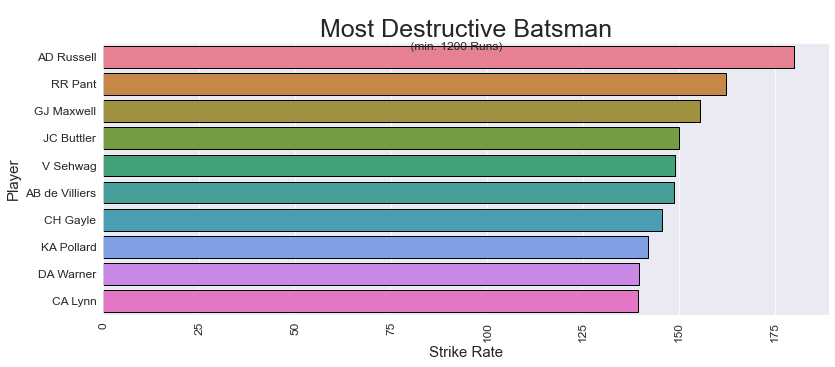

In [36]:
plt.figure(figsize=(13,5))
sns.barplot(x=strike_rate['rate'],y=strike_rate['batsman'],palette='husl',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Most Destructive Batsman',size=25)
plt.suptitle('\n\n\n (min. 1200 Runs)')
plt.ylabel('Player',size=15)
plt.xlabel('Strike Rate',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [37]:
#4.Best Bowlers

In [38]:
economy_rate=data1.groupby(['bowler']).sum()
economy_rate['over']=data1['bowler'].value_counts()/6
economy_rate['runs']=economy_rate['wide_runs']+ economy_rate['noball_runs']+ economy_rate['batsman_runs']
economy_rate=economy_rate[economy_rate['over']>=200]
economy_rate['rate']=economy_rate['runs']/economy_rate['over']
economy_rate=economy_rate.sort_values(by=['rate'],ascending=True).head(10)

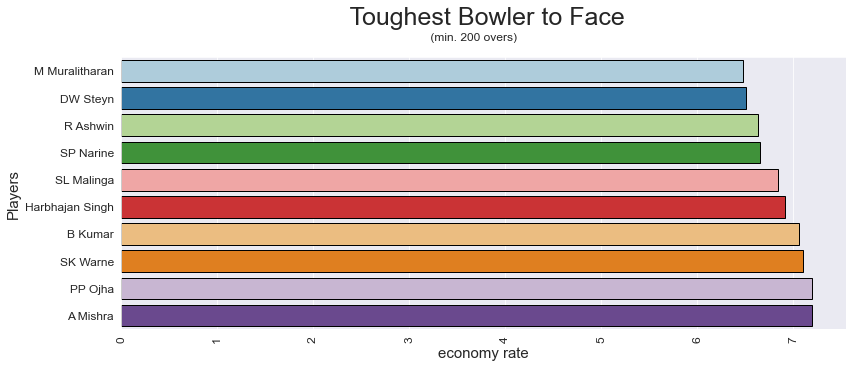

In [39]:
plt.figure(figsize=(13,5))
sns.barplot(x=economy_rate['rate'],y=economy_rate.index,palette='Paired',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title(' Toughest Bowler to Face\n',size=25)
plt.suptitle('\n (min. 200 overs)')
plt.ylabel('Players',size=15)
plt.xlabel('economy rate',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [40]:
dismissal=['caught','bowled','caught and bowled','hit wicket','lbw','stumped']
best_bowler=data1.loc[data1['dismissal_kind'].isin(dismissal)]
best_bowler=best_bowler['bowler'].value_counts().reset_index().head(10)
best_bowler.columns=['bowler','wickets']

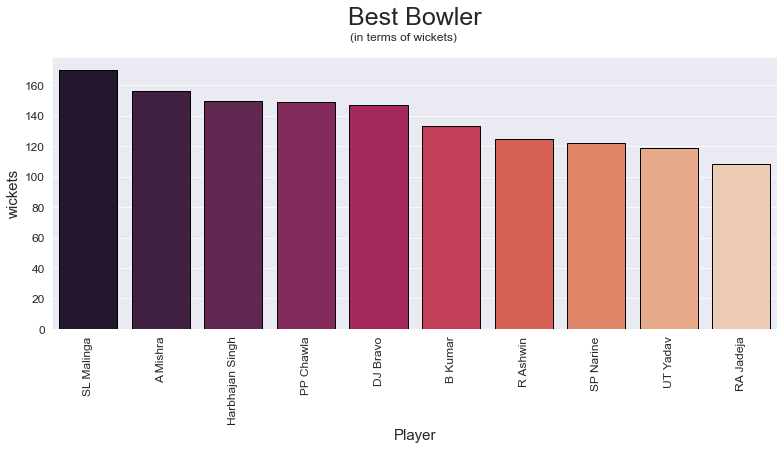

In [41]:
plt.figure(figsize=(13,5))
sns.barplot(x=best_bowler['bowler'],y=best_bowler['wickets'],palette='rocket',edgecolor='black')
plt.xticks(rotation='vertical')
plt.title('Best Bowler\n',size=25)
plt.suptitle('\n(in terms of wickets)')
plt.ylabel('wickets',size=15)
plt.xlabel('Player',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

In [42]:
#5.Wins at Homeground

In [43]:
venue=data2.groupby(['venue','winner']).count()
venue=venue.iloc[:-1,:1].reset_index()
venue=venue.pivot('venue','winner')
venue.fillna(0,inplace=True)
venue['total']=venue.sum(axis=1,skipna=False)
venue=venue.sort_values(by=['total'],ascending=False).head(15)
venue.drop(['total'],axis=1,inplace=True)

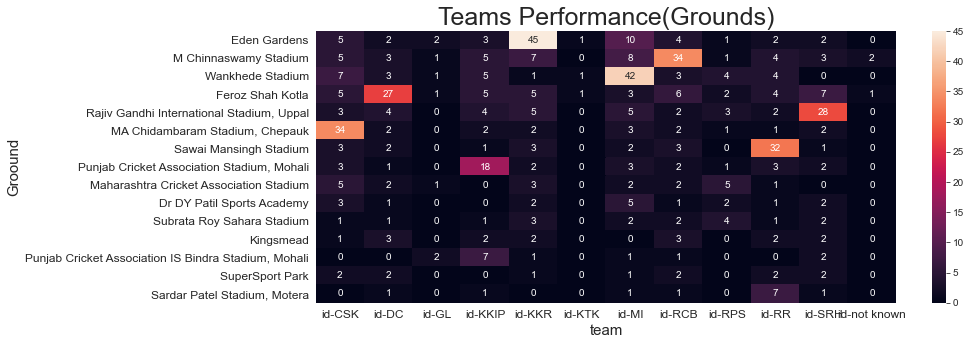

In [44]:
sns.set_style("dark")
plt.figure(figsize=(13,5))
sns.heatmap(data=venue,annot=True,cmap='rocket')
plt.title('Teams Performance(Grounds)',size=25)
plt.ylabel('Groound',size=15)
plt.xlabel('team',size=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

#Conclusion
From the above analysis we can conclude that
    if a company want to endorseits products they should slect succesfull teams such as
        MI or CSK who have most number of wins
        Man of matches such as AB de Villers, MS Dhoni, Chris Gayle, David Warner
        Batsmen such as Virat Kohli, Suresh Raina, Rohit Sharma,  AD Russel, Rishab Pant, Gien Maxwell
        Bowlers such as R Ashwin, Muraithran, DW Steyn, Sunil Narina, Malinga, A Mishra
        Many teams win facror depends upon their home ground, so home ground advantage is very crucial
